# Assignment #1 - Deep Neural Network

<font color="red"> <b> Due: Feb 22  11:59 pm </b> </font>

<font color="cyan"> SAMANTHA MICHAEL     </font>

# Introduction

This project develops a Neural Network with Tensorflow to classify the cultural origin of pottery artifacts based on their characteristics from the [Ceramics: Temporal-Spatial Dataset](https://core.tdar.org/dataset/6039/ceramics-temporal-spatial-dataset) obtained from the [Digital Archeological Record (tDAR)](https://core.tdar.org/search/).

The research aims to provide archaeologists with a computational tool that can aid in more efficiently categorizing and understanding past societies using deep learning techniques.


# Data

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)
dap = pd.read_csv('data/dap-tscer4.csv', low_memory=False)
dap.head()

,flag,site,fs,area,subarea,sutype,sunum,suhoriz,suvert,sugrid,susurf,sufap,sufat,fetype,fenum,fehoriz,fevert,fefat,collect,catno,pl,firing,temper,manipul,compact,cover,pnttype,color,cultcat,ware,type,form,lotwt,lotcnt,rimcnt,modcnt,sphandl,sstype,ssno,ccn,ccc,cci,rn,rc,ri,ihn,ihc,ihi,hn,hc,hi,uat,uan,uac,uai,aat,aan,aac,aai,eef,een,eec,eei,tn,tc,ti,pn,pc,pi,spn,spc,spi,mpn1,mpc1,mpc2,st1,st2,stc1,stc2,mpn,sittype,mpnew,cobjectid,csiteid,caccnid,cdept
0,E,23,2,NaN,Not assigned,GRID 4 X 4,312384,whole study unit,not applicable,0,MODERN GROUND SURF,INAPPLICABLE,INAPPLICABLE,INAPPLICABLE,0,NaN,not applicable,INAPPLICABLE,INTENSIVE SURFACE,4,No PL recorded,NEUTRAL,ANDESITE-DIORITE,PLAIN,UNPOLISHED-NONE,NONE,NONE,NONE,MESA V DOLORES,GRAY,MS-PRESPHENOID,JAR,17,6,6,INAPPLICABLE,UNASSIGNED,NOT APPLICABLE,0,MCPHEE-GRASS MESA,Medium high confidence,Medium high integrity,0,Not applicable,Lowest integrity,0,Not applicable,Lowest integrity,0,Not applicable,Lowest integrity,NOT APPLICABLE,0,Not applicable,Lowest integrity,NOT APPLICABLE,0,Not applicable,Not applicable,Unrecognized code,0,Not applicable,Lowest integrity,ANASAZI,Highest confidence,Highest integrity,MCPHEE,Medium high confidence,Medium high integrity,INAPPPLICABLE,Not applicable,Lowest integrity,MP IV,Medium high confidence,Not applicable,Unrecognized code,0,Unrecognized code,Not applicable,MPIV OR MPV,"HABITATION, NFS",OTHER,78.1.5MT23.CER.2.4.0,5MT23,78.1,CER
1,E,23,2,NaN,Not assigned,GRID 4 X 4,312384,whole study unit,not applicable,0,MODERN GROUND SURF,INAPPLICABLE,INAPPLICABLE,INAPPLICABLE,0,NaN,not applicable,INAPPLICABLE,INTENSIVE SURFACE,5,No PL recorded,NEUTRAL,ANDESITE-DIORITE,PLAIN,UNPOLISHED-NONE,NONE,NONE,NONE,MESA V DOLORES,GRAY,MS-PARIETAL,JAR,240,44,0,INAPPLICABLE,UNASSIGNED,NOT APPLICABLE,0,MCPHEE-GRASS MESA,Medium high confidence,Medium high integrity,0,Not applicable,Lowest integrity,0,Not applicable,Lowest integrity,0,Not applicable,Lowest integrity,NOT APPLICABLE,0,Not applicable,Lowest integrity,NOT APPLICABLE,0,Not applicable,Not applicable,Unrecognized code,0,Not applicable,Lowest integrity,ANASAZI,Highest confidence,Highest integrity,MCPHEE,Medium high confidence,Medium high integrity,INAPPPLICABLE,Not applicable,Lowest integrity,MP IV,Medium high confidence,Not applicable,Unrecognized code,0,Unrecognized code,Not applicable,MPIV OR MPV,"HABITATION, NFS",OTHER,78.1.5MT23.CER.2.5.0,5MT23,78.1,CER
2,E,23,2,NaN,Not assigned,GRID 4 X 4,312384,whole study unit,not applicable,0,MODERN GROUND SURF,INAPPLICABLE,INAPPLICABLE,INAPPLICABLE,0,NaN,not applicable,INAPPLICABLE,INTENSIVE SURFACE,6,No PL recorded,OXIDIZED,ANDESITE-DIORITE,PLAIN,POLISHED,NONE,NONE,NONE,MESA V BLANDING,RED,MS-TEMPORAL,BOWL,3,2,0,INAPPLICABLE,UNASSIGNED,NOT APPLICABLE,0,MCPHEE-GRASS MESA,Medium high confidence,Medium high integrity,0,Not applicable,Lowest integrity,0,Not applicable,Lowest integrity,0,Not applicable,Lowest integrity,NOT APPLICABLE,0,Not applicable,Lowest integrity,NOT APPLICABLE,0,Not applicable,Not applicable,Unrecognized code,0,Not applicable,Lowest integrity,ANASAZI,Highest confidence,Highest integrity,MCPHEE,Medium high confidence,Medium high integrity,INAPPPLICABLE,Not applicable,Lowest integrity,MP IV,Medium high confidence,Not applicable,Unrecognized code,0,Unrecognized code,Not applicable,MPIV OR MPV,"HABITATION, NFS",OTHER,78.1.5MT23.CER.2.6.0,5MT23,78.1,CER
3,E,23,2,NaN,Not assigned,GRID 4 X 4,312384,whole study unit,not applicable,0,MODERN GROUND SURF,INAPPLICABLE,INAPPLICABLE,INAPPLICABLE,0,NaN,not applicable,INAPPLICABLE,INTENSIVE SURFACE,7,No PL recorded,NEUTRAL,ANDESITE-DIORITE,FILLETED,UNPOLISHED-NONE,NONE,NONE,NONE,MESA V DOLORES,GRAY,MS-ALISPHENOID,JAR,11,1,0,INAPPLICABLE,UNASSIGNED,NOT APPLICABLE,0,MCPHEE-GRASS MESA,Medium high confidence,Medium high integrity,0,Not applicable,Lowest integrity,0,Not applicable,Lowest integrity,0,Not applicable,Lowest integrity,NOT APPLICABLE,0,Not applicable,Lowest integrity,NOT APPLICABLE,0,Not applicable,Not applicable,

In [ ]:
dap.isna().sum()

flag             0
site             0
fs               0
area         70693
subarea      30168
sutype           0
sunum            0
suhoriz       1769
suvert           0
sugrid           0
susurf           0
sufap            0
sufat            0
fetype           0
fenum            0
fehoriz      81603
fevert        5704
fefat            0
collect          0
catno            0
pl           12613
firing           0
temper           0
manipul          0
compact          0
cover            0
pnttype          0
color            0
cultcat          0
ware             0
type             0
form             0
lotwt            0
lotcnt           0
rimcnt           0
modcnt           0
sphandl          0
sstype           0
ssno             0
ccn            220
ccc              0
cci              0
rn               0
rc               0
ri               0
ihn              0
ihc              0
ihi              0
hn               0
hc               0
hi               0
uat              0
uan         

### High number of nulls:

* area - 70,693 nulls
* subarea - 30,168 nulls
* suhoriz - 1,769 nulls
* fehoriz (Feature horizontal) - 81,603 nulls
* fevert  (Vertical excavation position)
* pl (Point Location) - 12,613 nulls

#### Dropping the Features with the highest number of nulls

* area
* subarea
* suhoriz - 1,769 nulls - not as concerning since this is only around 2% of the data - this feature is about excavation methodology rather than a characteristic of the pottery and will be dropped. 
* fehoriz (Feature horizontal) - 81,603 nulls
* fevert  (Vertical excavation position) - 5,704 nulls - this is less concerning since this feature describes the depth of the archeological find. This could be a good predictor of the cultural category since the higher the depth of the find could correlate to the age / time period of the pottery. 
* pl

### Revelant Features

In [ ]:
dap = dap[['firing', 'temper', 'manipul', 'compact', 'color', 'pnttype', 'cover', 'ware', 'form', 'fevert', 'cultcat']]


| Feature | Description |
|---------|-------------|
| firing | Firing atmosphere |
| temper | Type of temper used |
| manipul | Surface manipulation |
| compact | Surface compaction |
| color | Paint colors used |
| pnttype | Paint type (organic, mineral, clay) |
| cover | Surface slips/coatings |
| ware | Manufacturing technique groups |
| form | Vessel shape/type |
|culcat|Cultural Category|

In [ ]:
dap.dtypes

firing     object
temper     object
manipul    object
compact    object
color      object
pnttype    object
cover      object
ware       object
form       object
fevert     object
cultcat    object
dtype: object

In [ ]:
dap.isna().sum()

firing        0
temper        0
manipul       0
compact       0
color         0
pnttype       0
cover         0
ware          0
form          0
fevert     5704
cultcat       0
dtype: int64

In [ ]:
dap.describe().T

,count,unique,top,freq
firing,81603,7,NEUTRAL,58789
temper,81603,32,ANDESITE-DIORITE,64690
manipul,81603,10,PLAIN,68736
compact,81603,5,UNPOLISHED-NONE,54616
color,81603,10,NONE,65060
pnttype,81603,9,NONE,65060
cover,81603,5,NONE,76580
ware,81603,8,GRAY,52060
form,81603,32,JAR,55838
fevert,75899,23,not applicable,73414


In [ ]:
features = ['firing', 'temper', 'manipul', 'compact', 'color', 'pnttype', 'cover', 'ware', 'form', 'fevert', 'cultcat']
for feature in features: 
    print(dap[feature].value_counts())
    print("-" * 50) 

firing
NEUTRAL          58789
OXIDIZED         12680
REFIRED           6488
VITRIFIED         3302
UNFIRED            271
SMUDGED             69
INDETERMINATE        4
Name: count, dtype: int64
--------------------------------------------------
temper
ANDESITE-DIORITE        64690
SJ CRUSHED ROCK          6744
SHERD A-D                1340
SAND-MULTILITHIC         1168
CONGLOM                  1153
SHERD AND SJ             1046
DAKOTA SANDSTN           1025
SAND-QUARTZ               753
SAND A-D                  691
DRK ANDESITE DIORITE      627
INDETERMINATE             447
TRACHY BASALT             324
DARK MATRIX SANDSTN       321
NONE                      291
COMBINED                  251
SHERD-QRTZ SAND           154
SHERD                     117
SANDSTONE                 114
SALMON SANDSTN            100
SANDSTN W-HEM              66
LA PLATA                   59
SHERD AND SANDSTN          32
CRUSHED QTZ-SAND           24
SHERD CONGLOMER            23
SHERD A-D SAND             2

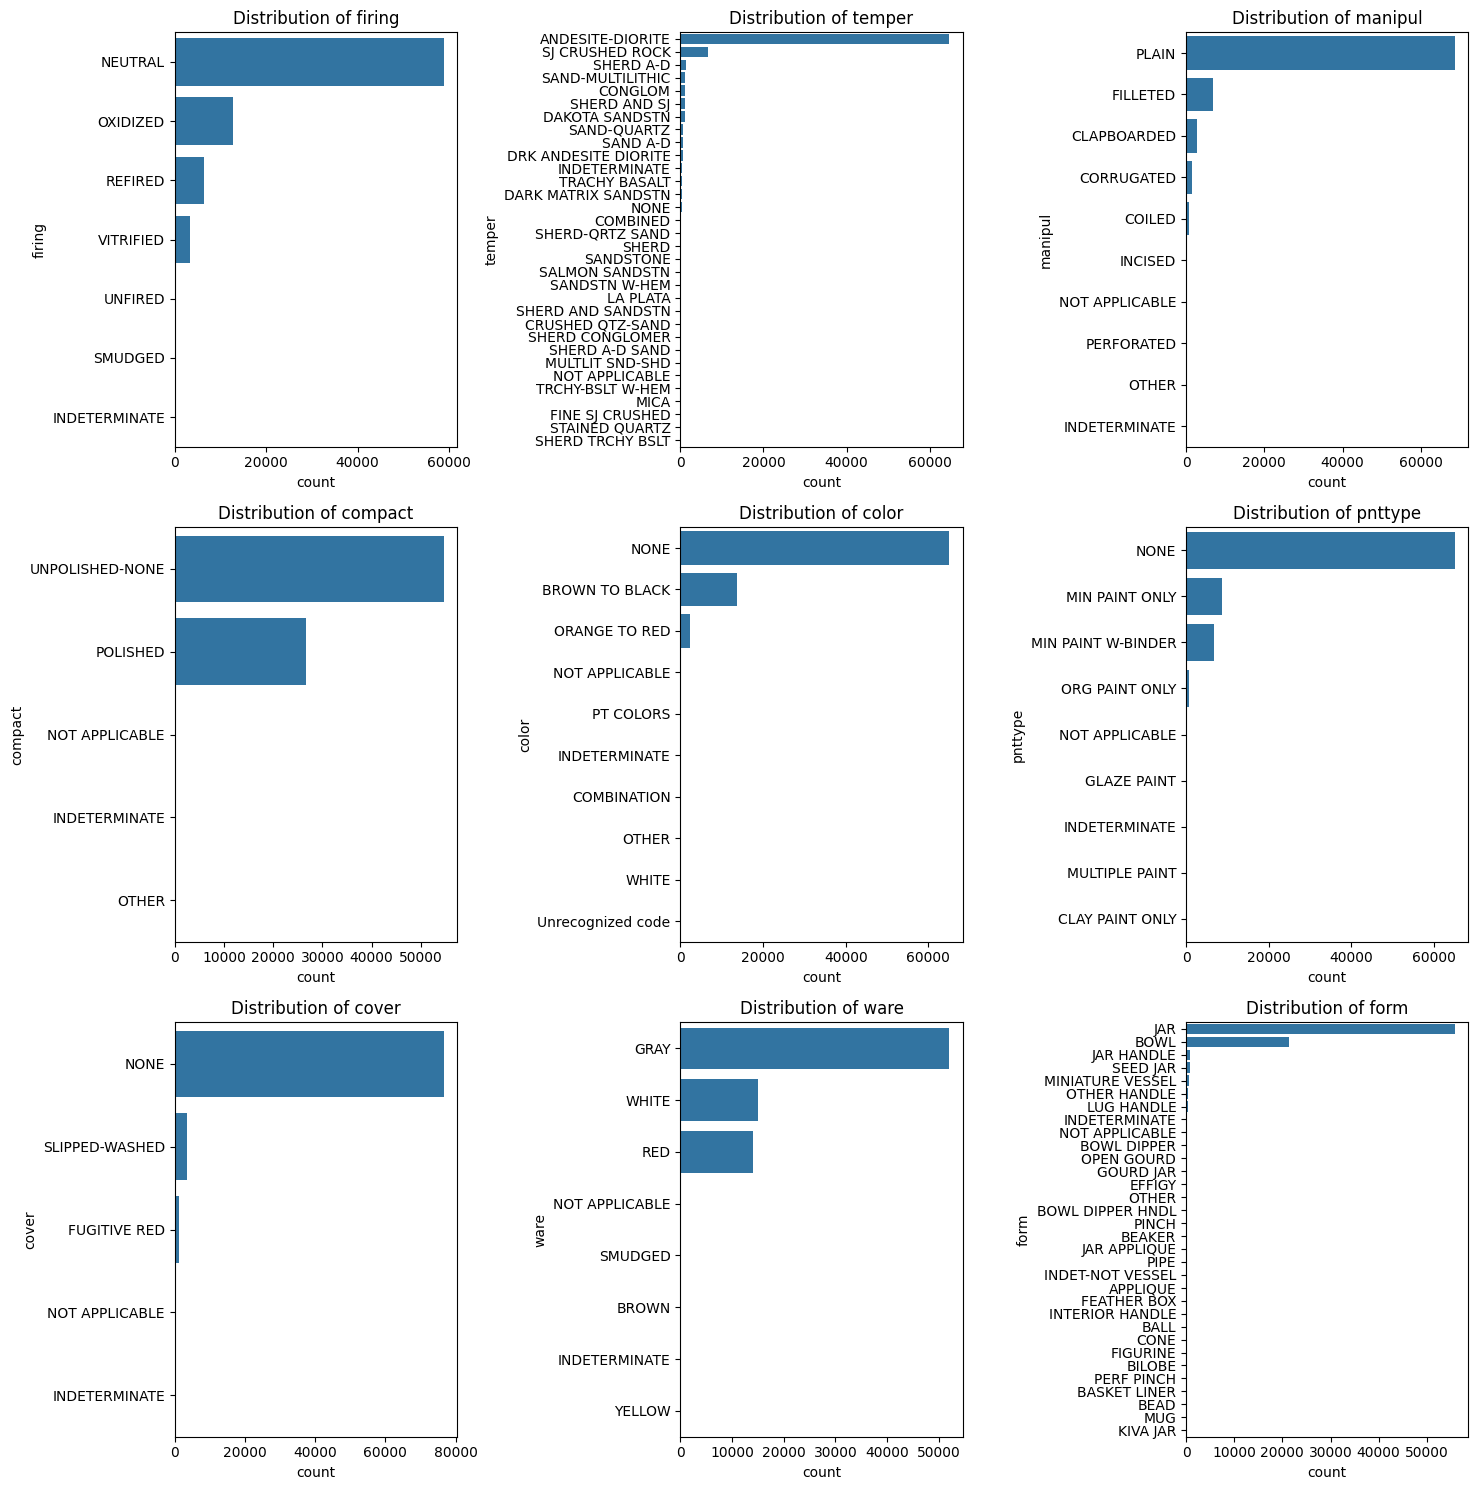

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
features = ['firing', 'temper', 'manipul', 'compact', 'color', 'pnttype', 'cover', 'ware', 'form']
for ax, feature in zip(axes.ravel(), features):
    sns.countplot(data=dap, y=feature, order=dap[feature].value_counts().index, ax=ax)
    ax.set_title(f'Distribution of {feature}')
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of Cultural Categories (Labels)')

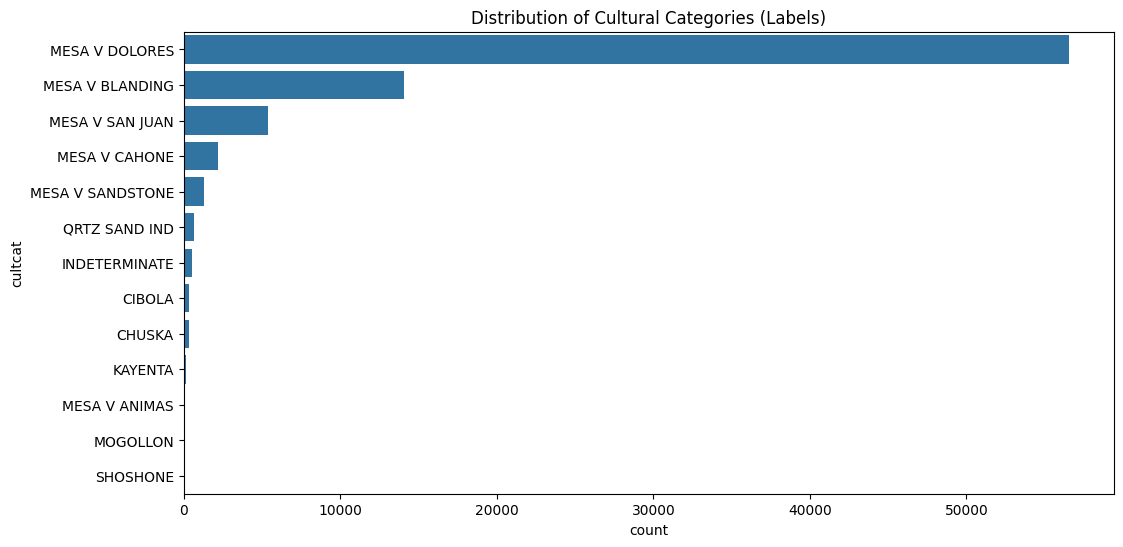

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dap, y='cultcat', order=dap['cultcat'].value_counts().index)
plt.title('Distribution of Cultural Categories (Labels)')

### Feature Distributions
#### Observations: 

Potentially Problematic:

* cover: 76,580/81,604 are "none" (~94%)
* color: 65,060/81,604 are "none" (~80%) - one color is 'unrecognized code'
* pnttype: 65,060/81,604 are "none" (~80%)
* fevert: 73,414/81,604 are "not applicable" (~90%)
* cultcat: 549/81,604 are "indeterminate" - these should be dropped

More Balanced/Informative:

* firing: Good distribution between NEUTRAL (58,789) and others
* ware: Well distributed between GRAY (52,060), WHITE (15,113), RED (14,119)
* form: Good variety with JAR (55,838) and BOWL (21,472) dominating
* temper: Rich variety with ANDESITE-DIORITE (64,690) dominant
* manipul: Dominated by PLAIN (68,736) but has meaningful variation
* compact: Binary-like between UNPOLISHED-NONE (54,616) and POLISHED (26,754)

Decisions to Keep or Drop Problematic Variables: 

* Dropping fevert since this variable unfortunately does not contain any information for our analysis
* Keeping cover as this refers to slip type. Not all pottery requires a slip
* Keeping pnttype since not all pottery is painted
* Keeping color because this refers to the paint type
* Remove "OTHER" from compact, color, and manipul since these are very few instances and we don't know what they represent
* Keep "OTHER HANDLE" in form because it's a specific subcategory of handles, not a catch-all "OTHER"
* Keeping "OTHER" in form since it might represent legitimate vessel forms that just didn't fit the main categories

### Removing Variables and Filtering Rows

In [ ]:
dap = dap.drop(columns={'fevert'}, axis=1)

remove_values = ['INDETERMINATE', 'NOT APPLICABLE', 'Unrecognized code']
feature_columns = ['firing', 'temper', 'manipul', 'compact', 'color', 'pnttype', 'cover', 'ware', 'form', 'cultcat']

for col in feature_columns:
    dap = dap[~dap[col].isin(remove_values)]

columns_to_remove_other = ['compact', 'color', 'manipul']
for col in columns_to_remove_other:
    dap = dap[dap[col] != 'OTHER']

dap_df = dap.copy(deep=True)
X = dap_df.drop('cultcat', axis=1)
y = dap_df['cultcat']


### Class Label Distributions

|Class Labels|Instances|
|-----|----|
|MESA V DOLORES|      56,571|
|MESA V BLANDING|     14,050|
|MESA V SAN JUAN|      5,386|
|MESA V CAHONE|        2,199|
|MESA V SANDSTONE|     1,306|
|QRTZ SAND IND|         640|
|INDETERMINATE|         549|
|CIBOLA|                351|
|CHUSKA|                328|
|KAYENTA|               136|
|MESA V ANIMAS|          58|
|MOGOLLON|               28|
|SHOSHONE|                1|

### Dealing with Imbalanced Classes
* Mesa Verde variants dominate the dataset (Mesa V Dolores: 56,571, Mesa V Blanding: 14,050 etc...) 
* Very few instances of some cultures (Shoshone: 1, Mogollon: 28, Mesa V Animas: 58)

### Filtering out Severely Underrepresented Class Labels
* Choosing to drop class labels with less than 100 instances and use SMOTE to rebalance the classes

In [ ]:
min_samples = 100
class_counts = y.value_counts()
valid_classes = class_counts[class_counts >= min_samples].index
mask = y.isin(valid_classes)
X_filtered = X[mask]
y_filtered = y[mask]

### Dummy Encoding all Categorical Variables

In [ ]:
X_encoded = pd.get_dummies(X_filtered, dtype=int)
# using LabelEncoder instead of get_dummies for y
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y_filtered)

In [ ]:
#y_encoded.columns

In [ ]:
#X_encoded.columns

### Applying Synthetic Minority Over-sampling Technique (SMOTE) to Correct for Imbalanced Classes

In [ ]:
from imblearn.over_sampling import SMOTE
# convert to numpy arrays
X_array = X_encoded.to_numpy()
y_array = y_encoded ## this is alrady a numpy array
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_array, y_array)

In [ ]:
print("Original shapes:", X_array.shape, y_array.shape)
print("After SMOTE:", X_smote.shape, y_smote.shape)

Original shapes: (80317, 95) (80317,)
After SMOTE: (504324, 95) (504324,)


In [ ]:
print("\nClass distribution after SMOTE:")
print(pd.Series(y_smote).value_counts())


Class distribution after SMOTE:
5    56036
3    56036
7    56036
4    56036
6    56036
2    56036
8    56036
0    56036
1    56036
Name: count, dtype: int64


In [ ]:
# save the data into numpy arrays
np.save('data/X_smote.npy', X_smote)
np.save('data/y_smote.npy', y_smote)

# save the label encoder
import pickle
import numpy as np
# save encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)


# References

Digital Archaeological Record. (1988). Ceramics: Temporal-Spatial Dataset (tDAR id: 6039). https://doi.org/10.6067/XCV8TD9WNB

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 10| Explanation of deep network architecture and choice of components
 | 10| explanation of codes
 | 20| Correct implementation/Preliminary Test
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis & retesting if need  
5 | Conclusions, References 